<a href="https://colab.research.google.com/github/yaajnu/ColabNotebooks/blob/master/Chapter6(Practice).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
X,y=make_moons(n_samples=10000,noise=0.4)


In [ ]:
y==0


array([False, False,  True, ...,  True,  True, False])

In [ ]:
X.shape

(10000, 2)

In [ ]:
x1=X[y==1]

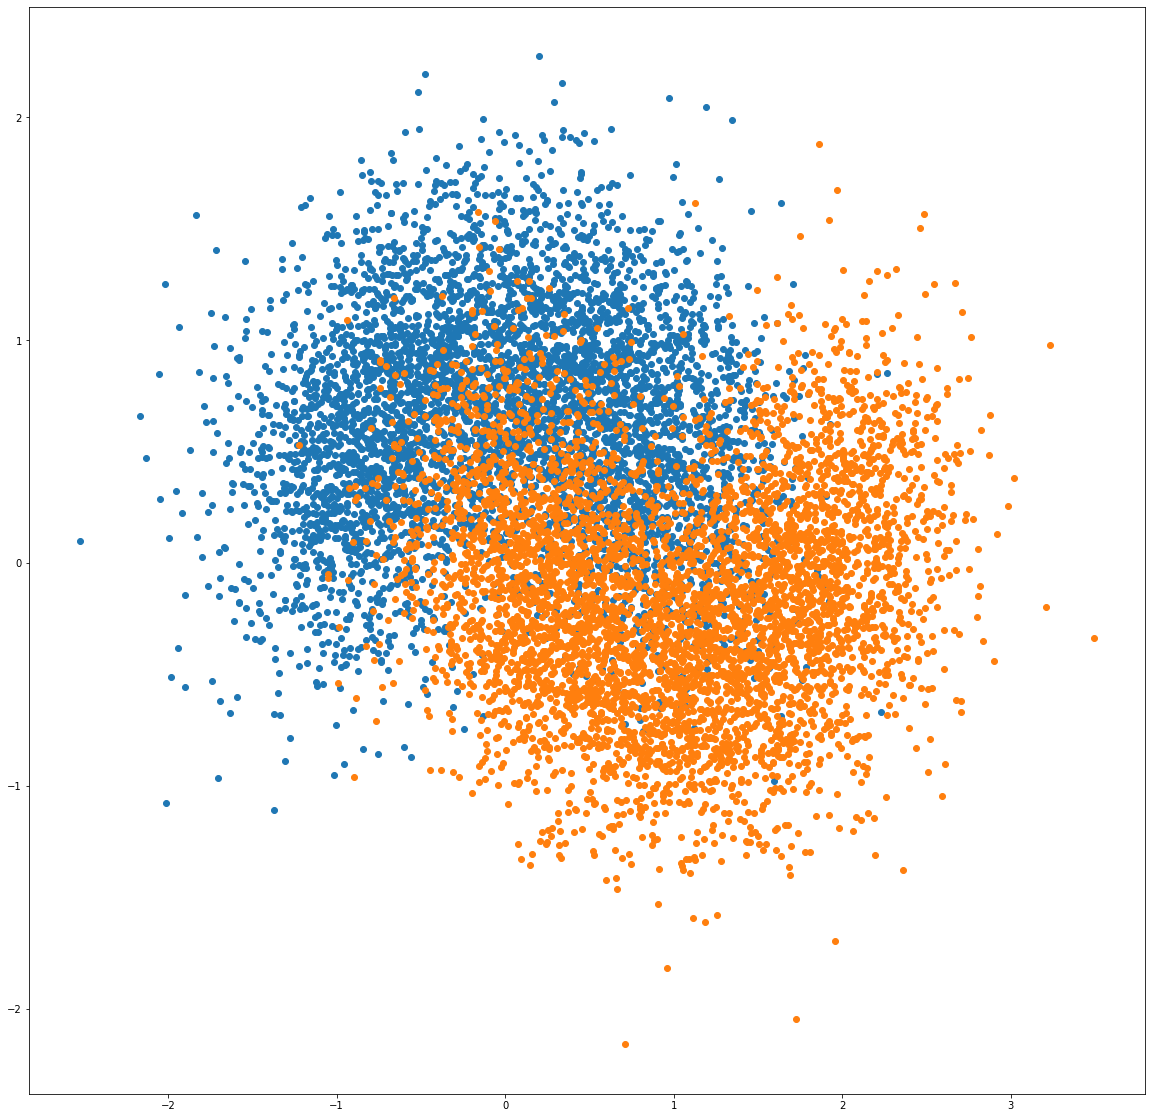

In [ ]:
x0=X[y==0]
plt.figure(figsize=(20,20))
plt.scatter(x0[:,0],x0[:,1])
plt.scatter(x1[:,0],x1[:,1])

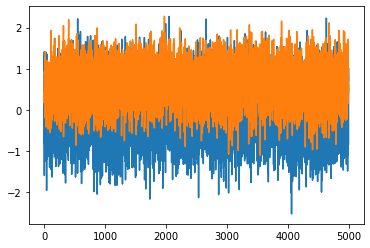

In [ ]:
plt.plot(x0,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [ ]:
X_train.shape

(7500, 2)

In [ ]:
import numpy as np
leaf=np.arange(5,16,1)
leaf

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
tree_clf=DecisionTreeClassifier()
parameters={'max_leaf_nodes':leaf,'max_depth':(2,3,4,5)}
gridsearch=GridSearchCV(tree_clf,parameters,cv=3,verbose=2)
gridsearch.fit(X,y)

Fitting 3 folds for each of 44 candidates, totalling 132 fits
[CV] max_depth=2, max_leaf_nodes=5 ...................................
[CV] .................... max_depth=2, max_leaf_nodes=5, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=5 ...................................
[CV] .................... max_depth=2, max_leaf_nodes=5, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=5 ...................................
[CV] .................... max_depth=2, max_leaf_nodes=5, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=6 ...................................
[CV] .................... max_depth=2, max_leaf_nodes=6, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=6 ...................................
[CV] .................... max_depth=2, max_leaf_nodes=6, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=6 ...................................
[CV] .................... max_depth=2, max_leaf_nodes=6, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=7 ...................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................... max_depth=2, max_leaf_nodes=15, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=15 ..................................
[CV] ................... max_depth=2, max_leaf_nodes=15, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=15 ..................................
[CV] ................... max_depth=2, max_leaf_nodes=15, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=5 ...................................
[CV] .................... max_depth=3, max_leaf_nodes=5, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=5 ...................................
[CV] .................... max_depth=3, max_leaf_nodes=5, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=5 ...................................
[CV] .................... max_depth=3, max_leaf_nodes=5, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=6 ...................................
[CV] .................... max_depth=3, max_leaf_nodes=6, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=6 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 132 out of 132 | elapsed:    1.2s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': (2, 3, 4, 5),
                         '

In [ ]:
gridsearch.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=12,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred=gridsearch.best_estimator_.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8648

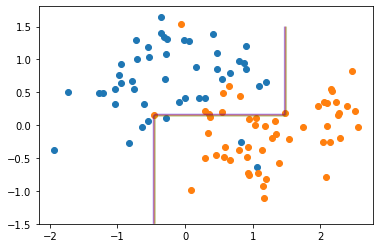

In [ ]:

X_test=X_test[:100]
y_test=y_test[:100]
plt.scatter(X_test[y_test==0][:,0],X_test[y_test==0][:,1])
plt.scatter(X_test[y_test==1][:,0],X_test[y_test==1][:,1])
x1s = np.linspace(-1.5,1.5, 100)
x2s = np.linspace(-1.5,1.5, 100)
x1, x2 = np.meshgrid(x1s, x2s)
X_new = np.c_[x1.ravel(), x2.ravel()]
y_pred=gridsearch.best_estimator_.predict(X_new).reshape(x1.shape)
plt.contour(x1,x2,y_pred,alpha=0.2,cmap=plt.cm.brg)

QUESTION 8


In [ ]:
from sklearn.model_selection import ShuffleSplit
ss=ShuffleSplit(n_splits=1000,test_size=len(X_train)-100,random_state=42)
mini_sets=[]

In [ ]:
for train_index,test_index in ss.split(X_train):
  mini_train=X_train[train_index]
  mini_labels=y_train[train_index]
  mini_sets.append((mini_train,mini_labels))

In [ ]:
mini_sets

[(array([[-1.10970690e+00,  3.79201196e-01],
         [ 7.42461340e-01,  6.64815728e-01],
         [ 1.45703986e+00, -3.82331937e-01],
         [-3.39909948e-01,  5.59129134e-02],
         [ 5.46348943e-01,  6.76359365e-01],
         [-4.41682287e-01,  3.14634426e-01],
         [ 3.00625117e-01,  2.22000531e-01],
         [ 1.65002556e+00,  5.48937290e-01],
         [-4.35567870e-01,  4.99758276e-01],
         [-1.42488777e+00,  8.80887046e-01],
         [-2.68916368e-01,  1.20494999e+00],
         [ 6.70577558e-01,  5.17217165e-01],
         [ 1.08673782e+00,  1.56268097e+00],
         [ 1.91762806e+00, -4.35869181e-01],
         [ 2.12067954e+00, -3.98921072e-01],
         [-6.75192335e-01,  4.92725423e-01],
         [ 1.69142522e+00, -3.83714509e-01],
         [-1.54390548e+00,  1.01058966e+00],
         [ 1.07730877e+00,  4.96973939e-02],
         [-1.90506090e-01, -4.61853037e-02],
         [ 1.41104451e+00, -5.15755476e-01],
         [-4.91926747e-01, -7.26859366e-02],
         [

In [ ]:
from sklearn.base import clone
mean=0
size=len(mini_sets)
#we clone as otherwise we get the same copy of classifier for evvery prediction
forest=[clone(gridsearch.best_estimator_) for _ in range(1000)]
for tree,(i,j) in zip(forest,mini_sets):
    tree.fit(i,j)
    tree.predict(X_test)
    mean+=accuracy_score(y_test,y_pred)
print(mean/size)

0.8115999999999987


In [ ]:
from scipy.stats import mode
pred=[]
for i in forest:
  pred.append(i.predict(X_test))


In [ ]:
majority_votes,_=mode(pred,axis=0)

In [ ]:
majority_votes.reshape([-1])

array([0, 1, 1, ..., 0, 1, 1])

In [ ]:
accuracy_score(y_test,majority_votes.reshape([-1]))

0.8632